In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC


In [3]:
# load raw data
xdat = np.loadtxt('xvals.dat')
ydat = np.loadtxt('yvals.dat')

# define training data
# NOTE: In this exercise we are not measuring performance
# or performing model selection, so for demonstration purposes
# we will use all of the data for training and there is no test set.
X_train = xdat
y_train = ydat

In [41]:
# fit the linear Support Vector Classifier
clf = SVC(C=1e3, kernel='linear', tol=1e-8, verbose=True)
clf.fit(X_train, y_train)

[LibSVM].................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................*.....................................................................................................................................................................................................................................................................................................................................*........................................................................................................................................

SVC(C=1000.0, kernel='linear', tol=1e-08, verbose=True)

Number of support vectors from each class: [16 17]


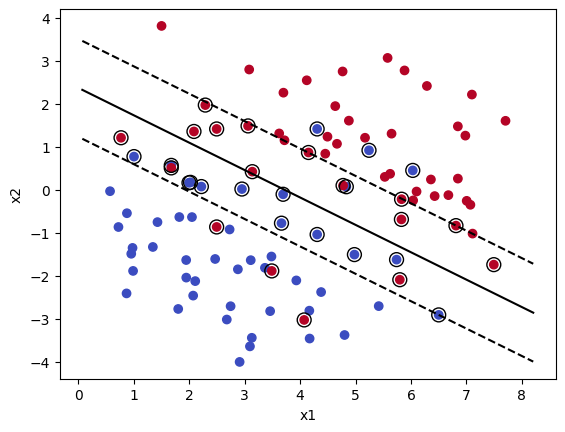

In [42]:
# plot training data
fig, ax = plt.subplots()
ax.scatter(xdat[:,0], xdat[:,1], c=ydat, cmap='coolwarm')
ax.set(xlabel='x1', ylabel='x2')

# set ranges for plots
x1_min, x1_max = xdat[:,0].min() - .5, xdat[:,0].max() + .5
x2_min, x2_max = xdat[:,1].min() - .5, xdat[:,1].max() + .5
xx1 = np.linspace(x1_min, x1_max)

# plot the decision boundary
w = clf.coef_[0]
b = clf.intercept_[0]
xx2 = (-w[0]/w[1])*xx1 - b/w[1]
ax.plot(xx1, xx2, 'k')

# circle the support vectors
sv = clf.support_vectors_
print('Number of support vectors from each class:', clf.n_support_)
ax.scatter(sv[:,0], sv[:,1], s=100, facecolors='none', edgecolors='k')

# plot the margin
margin = 1/np.linalg.norm(w) # margin of separation
a = -w[0]/w[1]
xx2_down = xx2-np.sqrt(1+a**2)*margin
xx2_up = xx2+np.sqrt(1+a**2)*margin
ax.plot(xx1, xx2_down, 'k--')
ax.plot(xx1, xx2_up, 'k--')

In [43]:
print(margin)
print(w)
print(b)

0.9603131228687151
[0.55976543 0.87808008]
-2.0813791958599066
